In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
games = pd.read_csv('./Dataset/Cleaned/cleaned_games_offset_total.csv')

In [3]:
def show_confusion_matrix(matrix, target, accuracy_score):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(5,5))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

    matrix = matrix.astype('float')/matrix.sum(axis=1)[:,np.newaxis]

    N, D = matrix.shape
    for n in range(N):
      for d in range(D):
        plt.text(d, n, "{:0.4f}".format(matrix[n, d]), horizontalalignment="center")

    plt.xlabel('Predicted\naccuracy={:0.2f}'.format(accuracy_score))
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Result for Linear Regression: Forward Selection
Prediction
[-1  1  0  0  0  0  0  1  0  1  0  0 -1  0  1  0  0 -1  1  0  0  1  0  0
  1  1  0 -1  0  0  0  0 -1 -1  0  1 -1  1 -1  1 -1 -1  0  0 -1  0 -1  0
  1  0 -1  0 -1 -1  1  1 -1  0  0  0  1  0  0  0 -1  0  1  0  0 -1  1  0
  0  1 -1  0 -1  1  0 -1  0  1  0 -1  0 -1  0 -1  0  0  0  1  1  0  0  1
 -1  1  1  0  0  0  0  0  0  0  0  0  1  0  0 -1  0 -1  1 -1]
True
[-1  1  1  1  1  0  1  1 -1  1  1  0  0  1  0  1  1 -1  1  1  1  0  1  1
  1  1  1 -1  1  1  0 -1 -1 -1  0  1  0  0 -1  1 -1 -1 -1  1 -1  0 -1 -1
  0 -1  0  1 -1 -1  1  1 -1  0 -1  1  1  0  1  1 -1  0  1 -1  1 -1  0 -1
 -1  1 -1 -1 -1  1  0  0 -1  0  0 -1  0 -1  1 -1  1  1 -1  0  1  0  0  1
 -1  1  1  1 -1  1 -1  0 -1 -1  0 -1  1  0  0 -1 -1 -1  1 -1]
Testing accuracy: 0.53


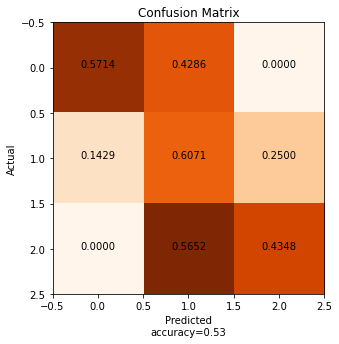

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Linear Regression: Forward Selection
forward_selected_list = np.sort(['FW_on-target', 'FW_time on opposite half', 'GK_distance in poss', 'GK_low activity',
                         'DF_avg max speed', 'DF_red', 'FW_total passes', 'MF_on-target', 'GK_total passes',
                         'DF_on-target', 'MF_red', 'MF_fouls suffered', 'MF_passes accuracy', 'FW_fouls suffered',
                         'FW_low activity', 'FW_distance not in poss', 'FW_sprints', 'GK_passes_succeed', 'GK_saves',
                         'GK_yellow', 'GK_time on opposite third', 'DF_yellow', 'MF_tackles suffered losing ball',
                         'GK_fouls suffered', 'FW_distance', 'DF_total passes', 'DF_distance in poss',
                         'DF_tackles suffered losing ball', 'MF_tackles gaining ball', 'GK_avg max speed',
                         'MF_time on opposite pen', 'MF_time on opposite third', 'MF_time on opposite half', 'FW_total shots'])

X = games[forward_selected_list]
y = games["result"]

# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# test
prediction = np.round(linear_regression.predict(X_test)).astype(int)
prediction[prediction <= -0.5] = -1
prediction[prediction >= 0.5] = 1

print("Result for Linear Regression: Forward Selection")
print("Prediction")
print(prediction)
print("True")
print(np.array(y_test))
print("Testing accuracy: %.2f" % (accuracy_score(y_test, prediction)))

show_confusion_matrix(confusion_matrix(y_test, prediction), ['Lose', 'Tie', 'Win'], accuracy_score(y_test, prediction))

Result for Linear Regression: Backward Elimination
Prediction
[-1  0  1  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0  0  1  0  0
  1  1  0 -1  0  1  0 -1 -1 -1  0  1  0  1 -1  0 -1 -1  0  0 -1  0 -1  0
  1  0  0  1 -1 -1  1  1 -1  1  0  1  1  1  0  0 -1  0  1  0  0 -1  0  0
  0  1 -1  0 -1  1  0 -1  0  1  0 -1  0 -1  0  0  0  1  0  0  1 -1  0  1
 -1  1  1  0 -1  1 -1  0  0  0  0  0  1  0  0 -1  0 -1  1 -1]
True
[-1  1  1  1  1  0  1  1 -1  1  1  0  0  1  0  1  1 -1  1  1  1  0  1  1
  1  1  1 -1  1  1  0 -1 -1 -1  0  1  0  0 -1  1 -1 -1 -1  1 -1  0 -1 -1
  0 -1  0  1 -1 -1  1  1 -1  0 -1  1  1  0  1  1 -1  0  1 -1  1 -1  0 -1
 -1  1 -1 -1 -1  1  0  0 -1  0  0 -1  0 -1  1 -1  1  1 -1  0  1  0  0  1
 -1  1  1  1 -1  1 -1  0 -1 -1  0 -1  1  0  0 -1 -1 -1  1 -1]
Testing accuracy: 0.59


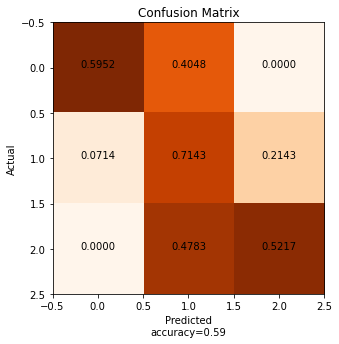

In [9]:
# Linear Regression: Backward Elimination
backward_selected_list = np.sort(['GK_total passes', 'GK_fouls suffered', 'GK_avg max speed', 'GK_low activity',
                                  'GK_mid activity', 'GK_high activity', 'GK_yellow', 'DF_passes_succeed', 'DF_total passes',
                                  'DF_passes accuracy', 'DF_on-target', 'DF_fouls suffered', 'DF_distance', 'DF_distance in poss',
                                  'DF_avg max speed', 'DF_low activity', 'DF_mid activity', 'DF_high activity', 'DF_red',
                                  'DF_tackles suffered losing ball', 'MF_passes_succeed', 'MF_total passes', 'MF_passes accuracy',
                                  'MF_total shots', 'MF_on-target', 'MF_time on opposite half', 'MF_time on opposite third',
                                  'MF_time on opposite pen', 'MF_avg max speed', 'MF_tackles gaining ball', 'FW_total passes',
                                  'FW_total shots', 'FW_on-target', 'FW_fouls committed', 'FW_fouls suffered', 'FW_time on opposite half',
                                  'FW_time on opposite third', 'FW_low activity', 'FW_saves', 'FW_yellow'])

X = games[backward_selected_list]
y = games["result"]

# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# test
prediction = np.round(linear_regression.predict(X_test)).astype(int)
prediction[prediction <= -0.5] = -1
prediction[prediction >= 0.5] = 1

print("Result for Linear Regression: Backward Elimination")
print("Prediction")
print(prediction)
print("True")
print(np.array(y_test))
print("Testing accuracy: %.2f" % (accuracy_score(y_test, prediction)))

show_confusion_matrix(confusion_matrix(y_test, prediction), ['Lose', 'Tie', 'Win'], accuracy_score(y_test, prediction))